#Kickstarter Platform Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reading the data from .csv file
data = "kickstarter_data_full.csv"
kickstarter_df = pd.read_csv(data)
# checking the shape of dataset
kickstarter_df.shape

<ipython-input-153-ba3fdcf7ad4e>:7: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_df = pd.read_csv(data)


(20632, 68)

In [ ]:
kickstarter_df.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [ ]:
# finding the percentage of missing values
total_cells = np.product(kickstarter_df.shape)
total_missing = kickstarter_df.isnull().sum().sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing values in the dataset: {:.2f}%".format(percent_missing))

Percentage of missing values in the dataset: 6.00%


In [ ]:
# Checking the number of null values for each variable
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   20632 non-null  int64  
 1   id                           20632 non-null  int64  
 2   photo                        20632 non-null  object 
 3   name                         20632 non-null  object 
 4   blurb                        20627 non-null  object 
 5   goal                         20632 non-null  float64
 6   pledged                      20632 non-null  float64
 7   state                        20632 non-null  object 
 8   slug                         20632 non-null  object 
 9   disable_communication        20632 non-null  bool   
 10  country                      20632 non-null  object 
 11  currency                     20632 non-null  object 
 12  currency_symbol              20632 non-null  object 
 13  currency_trailin

In [ ]:
# Dropping the columns that have more than 90% of null values.
cols_to_drop = ['friends', 'is_starred', 'is_backing', 'permissions']
kickstarter_df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [ ]:
#We can observe that there are around 2000 rows having null values, so dropping those rows with null values.
kickstarter_df = kickstarter_df.dropna()

In [ ]:
#Shape of data after dropping columns
kickstarter_df.shape

(18696, 64)

In [ ]:
# finding the percentage of missing values
total_cells = np.product(kickstarter_df.shape)
total_missing = kickstarter_df.isnull().sum().sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing values in the dataset: {:.2f}%".format(percent_missing))

Percentage of missing values in the dataset: 0.00%


In [ ]:
#Checking the number of null values for each variable
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18696 entries, 0 to 20631
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   18696 non-null  int64  
 1   id                           18696 non-null  int64  
 2   photo                        18696 non-null  object 
 3   name                         18696 non-null  object 
 4   blurb                        18696 non-null  object 
 5   goal                         18696 non-null  float64
 6   pledged                      18696 non-null  float64
 7   state                        18696 non-null  object 
 8   slug                         18696 non-null  object 
 9   disable_communication        18696 non-null  bool   
 10  country                      18696 non-null  object 
 11  currency                     18696 non-null  object 
 12  currency_symbol              18696 non-null  object 
 13  currency_trailin

In [ ]:
#check the number of null values for each column
for column_name in kickstarter_df.columns:
    null_empty_count = kickstarter_df[column_name].isna().sum()
    print(f" NA values in '{column_name}': {null_empty_count}")

 NA values in 'Unnamed: 0': 0
 NA values in 'id': 0
 NA values in 'photo': 0
 NA values in 'name': 0
 NA values in 'blurb': 0
 NA values in 'goal': 0
 NA values in 'pledged': 0
 NA values in 'state': 0
 NA values in 'slug': 0
 NA values in 'disable_communication': 0
 NA values in 'country': 0
 NA values in 'currency': 0
 NA values in 'currency_symbol': 0
 NA values in 'currency_trailing_code': 0
 NA values in 'deadline': 0
 NA values in 'state_changed_at': 0
 NA values in 'created_at': 0
 NA values in 'launched_at': 0
 NA values in 'staff_pick': 0
 NA values in 'backers_count': 0
 NA values in 'static_usd_rate': 0
 NA values in 'usd_pledged': 0
 NA values in 'creator': 0
 NA values in 'location': 0
 NA values in 'category': 0
 NA values in 'profile': 0
 NA values in 'spotlight': 0
 NA values in 'urls': 0
 NA values in 'source_url': 0
 NA values in 'name_len': 0
 NA values in 'name_len_clean': 0
 NA values in 'blurb_len': 0
 NA values in 'blurb_len_clean': 0
 NA values in 'deadline_week

In [ ]:
# Check if there are duplicate values
kickstarter_df.duplicated().any()

False

In [ ]:
date_columns = ['deadline', 'state_changed_at', 'created_at', 'launched_at']
# Convert date columns to datetime format
for col in date_columns:
    kickstarter_df[col] = pd.to_datetime(kickstarter_df[col])

text_columns = ['name', 'blurb']
# Clean text columns by removing special characters
for col in text_columns:
    kickstarter_df[col] = kickstarter_df[col].astype(str)
    kickstarter_df[col] = kickstarter_df[col].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

print(kickstarter_df[date_columns + text_columns].head())

             deadline    state_changed_at          created_at  \
0 2015-01-23 10:35:00 2015-01-23 10:35:00 2014-11-29 22:55:00   
1 2015-05-01 16:13:00 2015-05-01 16:13:00 2015-02-20 09:28:00   
2 2015-03-26 08:17:00 2015-03-26 08:17:00 2015-01-24 00:08:00   
3 2014-10-06 00:41:00 2014-10-06 00:41:00 2014-09-05 22:30:00   
4 2016-06-27 12:00:00 2016-06-27 12:00:00 2016-05-25 14:09:00   

          launched_at                                               name  \
0 2014-12-17 13:47:00  Auntie Dis Music Time Sign ASL for Hearing and...   
1 2015-03-02 16:13:00                    Jump Start Kindergarten Toolkit   
2 2015-01-25 08:17:00  Ojukwu Balewa Awolowo OBA Public Library Of Ni...   
3 2014-09-06 00:41:00             MASTIZE  masTAHYZ MAStahyz   to spread   
4 2016-05-26 05:57:00    Synopse der EUDSGVO  Artikel Erwgungsgrnde BDSG   

                                               blurb  
0  MTS ASL Curriculum Workbook is a reproducible ...  
1  This kit teaches how to print correct a

In [ ]:
kickstarter_df.shape

(18696, 64)

In [ ]:
kickstarter_df.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Dis Music Time Sign ASL for Hearing and...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,This kit teaches how to print correct an ugly ...,500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo OBA Public Library Of Ni...,Establishing a free worldclass public library ...,100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",MASTIZE masTAHYZ MAStahyz to spread,Goal Introducing a new word into the English l...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Synopse der EUDSGVO Artikel Erwgungsgrnde BDSG,Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [ ]:
# Extracting and printing sample JSON strings
for json_str in kickstarter_df['urls'].sample(10):
    try:
        location_data = json.loads(json_str)
        print(location_data)
    except json.JSONDecodeError:
        print("JSONDecodeError encountered.")
    except TypeError:
        print("TypeError encountered.")

{'web': {'project': 'https://www.kickstarter.com/projects/1572184716/perbeat-bluetooth-handsfree-and-streaming-audio-ki?ref=category', 'message_creator': 'https://www.kickstarter.com/projects/1572184716/perbeat-bluetooth-handsfree-and-streaming-audio-ki/messages/new?message%5Bto%5D=1572184716', 'rewards': 'https://www.kickstarter.com/projects/1572184716/perbeat-bluetooth-handsfree-and-streaming-audio-ki/rewards'}, 'api': {'star': 'https://api.kickstarter.com/v1/projects/186374014/star?signature=1487284463.a765532c18092c35a2e11ca59991c82d7f77a9df', 'message_creator': 'https://api.kickstarter.com/v1/projects/186374014/messages?signature=1487284463.6dd8994ee7120344f3df50fc8c5db1664caf0a57'}}
{'web': {'project': 'https://www.kickstarter.com/projects/1050477882/inspire-viewer?ref=category', 'rewards': 'https://www.kickstarter.com/projects/1050477882/inspire-viewer/rewards'}}
{'web': {'project': 'https://www.kickstarter.com/projects/2024119339/dairytech-herd-and-performance-tracking-software

In [ ]:
import json
def extract_json_field(json_str, field):
    try:
        json_data = json.loads(json_str)
        return json_data.get(field, None)
    except json.JSONDecodeError:
        return None
    except TypeError:
        return None

fields_to_extract = {
    'creator': 'name'}

for column, field in fields_to_extract.items():
    new_col_name = f"{column}_{field}"
    kickstarter_df[new_col_name] = kickstarter_df[column].apply(lambda x: extract_json_field(x, field))
# Extract new columns
kickstarter_df[['creator', 'creator_name']].head()

,creator,creator_name
0,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",Diana L. Smith
1,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",Amy Planalp
2,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","Emmanuel Adeyefa-Olasupo, BA, Msc, MPhil"
3,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",Michael Felder
4,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",Werner Hülsmann


In [ ]:
def extract_project_url(json_str):
    try:
        urls_data = json.loads(json_str)
        return urls_data['web']['project'] if 'web' in urls_data and 'project' in urls_data['web'] else None
    except json.JSONDecodeError:
        return None
    except TypeError:
        return None
# Extract new columns
kickstarter_df['urls_project'] = kickstarter_df['urls'].apply(extract_project_url)
kickstarter_df[['urls', 'urls_project']].head()

,urls,urls_project
0,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/projects/146957987...
1,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/projects/469955675...
2,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/projects/843612324...
3,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/projects/926977749...
4,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/projects/efweha/sy...


In [ ]:
def extract_city_state(json_str):
    try:
        location_data = json.loads(json_str)
        # Extract 'name' for city and 'state' for state
        city = location_data.get('name', None)
        state = location_data.get('state', None)
        return city, state
    except json.JSONDecodeError:
        return None, None
    except TypeError:
        return None, None

kickstarter_df[['location_city', 'location_state']] = kickstarter_df['location'].apply(
    lambda x: pd.Series(extract_city_state(x))
)

kickstarter_df[['location', 'location_city', 'location_state']].head()

,location,location_city,location_state
0,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",San Fernando,CA
1,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Greenwood,IN
2,"{""country"":""NG"",""urls"":{""web"":{""discover"":""htt...",Lagos,Lagos
3,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",Branson,MO
4,"{""country"":""DE"",""urls"":{""web"":{""discover"":""htt...",Ismaning,Bavaria


In [ ]:
kickstarter_df.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,creator_name,urls_project,location_city,location_state
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Dis Music Time Sign ASL for Hearing and...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36,0,1,1,0,0,Diana L. Smith,https://www.kickstarter.com/projects/146957987...,San Fernando,CA
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,This kit teaches how to print correct an ugly ...,500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60,0,1,1,0,0,Amy Planalp,https://www.kickstarter.com/projects/469955675...,Greenwood,IN
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo OBA Public Library Of Ni...,Establishing a free worldclass public library ...,100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60,0,1,1,0,0,"Emmanuel Adeyefa-Olasupo, BA, Msc, MPhil",https://www.kickstarter.com/projects/843612324...,Lagos,Lagos
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",MASTIZE masTAHYZ MAStahyz to spread,Goal Introducing a new word into the English l...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30,0,1,1,0,0,Michael Felder,https://www.kickstarter.com/projects/926977749...,Branson,MO
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Synopse der EUDSGVO Artikel Erwgungsgrnde BDSG,Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32,0,0,0,0,0,Werner Hülsmann,https://www.kickstarter.com/projects/efweha/sy...,Ismaning,Bavaria


In [ ]:
kickstarter_clean = kickstarter_df.drop(kickstarter_df.columns[0], axis=1)
#We manually identified some features which are not useful for prediction and dropping them.
Features_to_drop = ['slug','currency_symbol','currency_trailing_code','profile','source_url',
                   'name_len','name_len_clean','blurb_len','blurb_len_clean',
                    'deadline_month','deadline_day','deadline_yr','deadline_hr','state_changed_at_month',
                   'state_changed_at_day','state_changed_at_yr','state_changed_at_hr','created_at_month','created_at_day','created_at_yr','created_at_hr',
                   'launched_at_month','launched_at_day','launched_at_yr','launched_at_hr','create_to_launch','launch_to_deadline','launch_to_state_change',
                    'USorGB','LaunchedTuesday','DeadlineWeekend','creator','location','urls']
kickstarter_clean.drop(labels=Features_to_drop, axis=1, inplace=True)

kickstarter_clean.head()

,id,photo,name,blurb,goal,pledged,state,disable_communication,country,currency,...,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,TOPCOUNTRY,creator_name,urls_project,location_city,location_state
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Dis Music Time Sign ASL for Hearing and...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,False,US,USD,...,Wednesday,17,36,36,0,1,Diana L. Smith,https://www.kickstarter.com/projects/146957987...,San Fernando,CA
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,This kit teaches how to print correct an ugly ...,500.0,0.0,failed,False,US,USD,...,Monday,10,60,60,0,1,Amy Planalp,https://www.kickstarter.com/projects/469955675...,Greenwood,IN
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo OBA Public Library Of Ni...,Establishing a free worldclass public library ...,100000.0,120.0,failed,False,US,USD,...,Sunday,1,60,60,0,1,"Emmanuel Adeyefa-Olasupo, BA, Msc, MPhil",https://www.kickstarter.com/projects/843612324...,Lagos,Lagos
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",MASTIZE masTAHYZ MAStahyz to spread,Goal Introducing a new word into the English l...,5000.0,0.0,failed,False,US,USD,...,Saturday,0,30,30,0,1,Michael Felder,https://www.kickstarter.com/projects/926977749...,Branson,MO
4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Synopse der EUDSGVO Artikel Erwgungsgrnde BDSG,Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,False,DE,EUR,...,Thursday,0,32,32,0,0,Werner Hülsmann,https://www.kickstarter.com/projects/efweha/sy...,Ismaning,Bavaria


In [ ]:
kickstarter_clean.shape

(18696, 33)

In [ ]:
kickstarter_clean.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'category',
       'spotlight', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'create_to_launch_days',
       'launch_to_deadline_days', 'launch_to_state_change_days',
       'SuccessfulBool', 'TOPCOUNTRY', 'creator_name', 'urls_project',
       'location_city', 'location_state'],
      dtype='object')

In [ ]:
text_columns = ['name', 'blurb', 'creator_name', 'location_city', 'location_state']

for col in text_columns:
    kickstarter_clean[col] = kickstarter_clean[col].astype(str)
    kickstarter_clean[col] = kickstarter_clean[col].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

print(kickstarter_clean[text_columns].head())

                                                name  \
0  Auntie Dis Music Time Sign ASL for Hearing and...   
1                    Jump Start Kindergarten Toolkit   
2  Ojukwu Balewa Awolowo OBA Public Library Of Ni...   
3             MASTIZE  masTAHYZ MAStahyz   to spread   
4    Synopse der EUDSGVO  Artikel Erwgungsgrnde BDSG   

                                               blurb  \
0  MTS ASL Curriculum Workbook is a reproducible ...   
1  This kit teaches how to print correct an ugly ...   
2  Establishing a free worldclass public library ...   
3  Goal Introducing a new word into the English l...   
4  Zu den Artikeln der DSGVO sind die korrespondi...   

                           creator_name location_city location_state  
0                         Diana L Smith  San Fernando             CA  
1                           Amy Planalp     Greenwood             IN  
2  Emmanuel AdeyefaOlasupo BA Msc MPhil         Lagos          Lagos  
3                        Michael Felder   

In [ ]:
kickstarter_clean.to_csv('kickstarter_clean.csv', index=False)

In [ ]:
zero_backers_count = (kickstarter_clean['backers_count'] == 0).sum()
print(f"Number of projects with 0 backers: {zero_backers_count}")

Number of projects with 0 backers: 2781


In [ ]:
staffpick = (kickstarter_clean['staff_pick'] == True).sum()
print(f"Number of projects Staff_Picked: {staffpick}")

Number of projects Staff_Picked: 1763


<ipython-input-179-74920720a201>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = kickstarter_clean.corr()


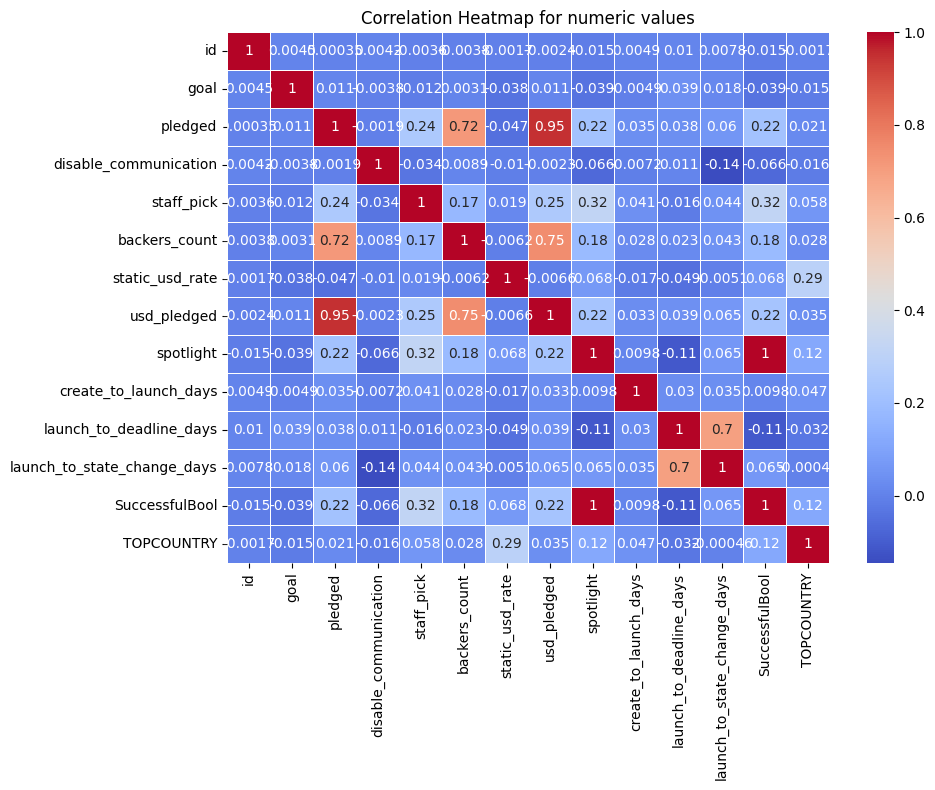

In [ ]:
correlation_matrix = kickstarter_clean.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for numeric values')
plt.tight_layout()
plt.show()

##Creating visuals using the cleaned dataset

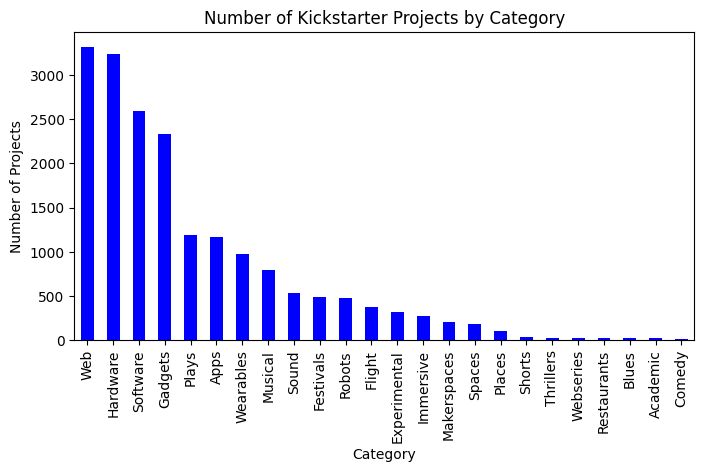

In [ ]:
# Bar plot of number of kickstarter projects by category
category_counts = kickstarter_clean['category'].value_counts()
plt.figure(figsize=(8,4))
category_counts.plot(kind='bar', color='blue')
plt.title('Number of Kickstarter Projects by Category')
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)
plt.show()

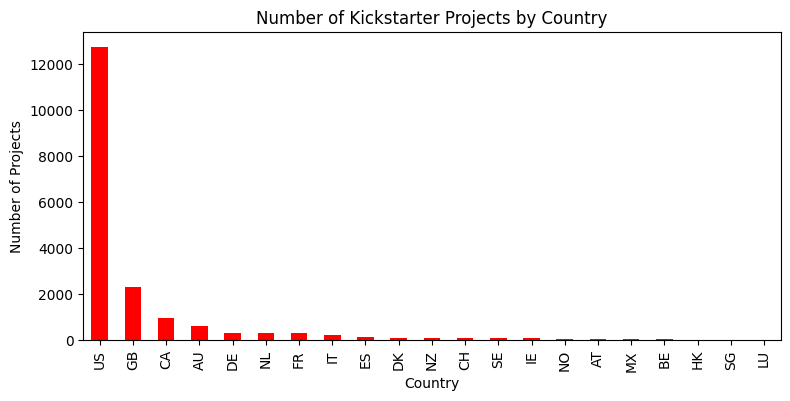

In [ ]:
# Bar plot for number of kickstarter projects by country
country_counts = kickstarter_clean['country'].value_counts()
country_counts.plot(kind='bar', figsize=(9,4),color='red')
plt.title('Number of Kickstarter Projects by Country')
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.show()

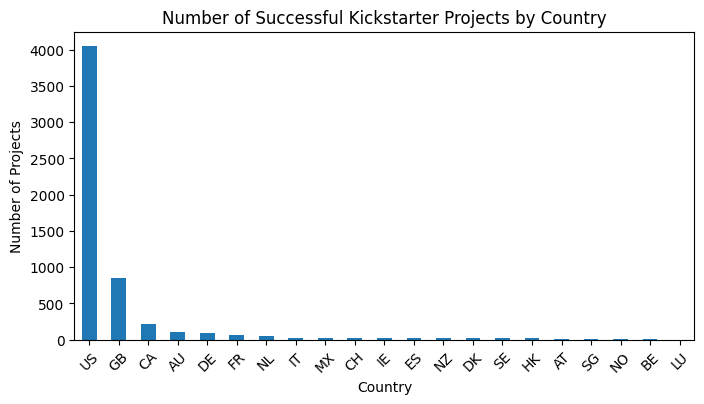

In [ ]:
# Barplot for Number of successful Projects by country
successful_projects = kickstarter_clean[(kickstarter_clean['state'] == 'successful') | (kickstarter_clean['state'] == 'live')]
country_counts = successful_projects['country'].value_counts()
plt.figure(figsize=(8,4))
country_counts.plot(kind='bar')
plt.title('Number of Successful Kickstarter Projects by Country')
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()

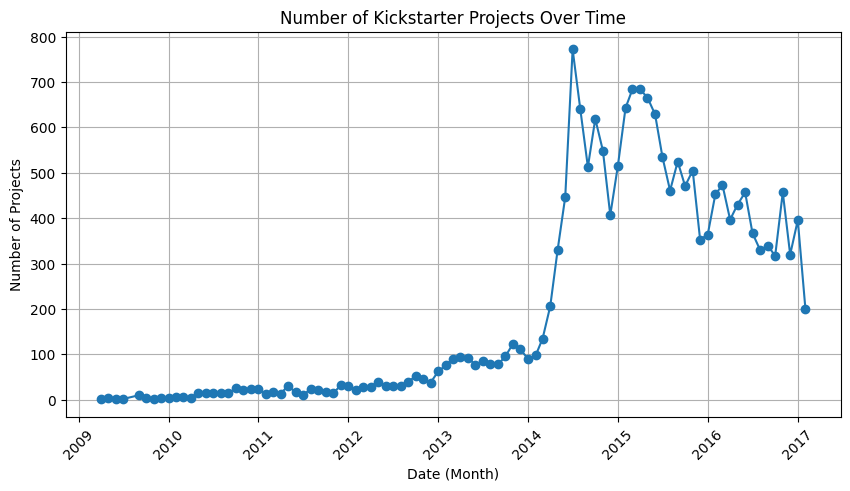

In [ ]:
# Timeseries plot for Number of Projects over time
kickstarter_clean['launched_at'] = pd.to_datetime(kickstarter_clean['launched_at'], format='%m/%d/%Y %H:%M')
monthly_project_counts = kickstarter_clean.groupby(kickstarter_clean['launched_at'].dt.to_period('M')).size()
monthly_project_counts.index = monthly_project_counts.index.to_timestamp()
plt.figure(figsize=(10,5))
plt.plot(monthly_project_counts.index, monthly_project_counts.values, marker='o', linestyle='-')
plt.title('Number of Kickstarter Projects Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

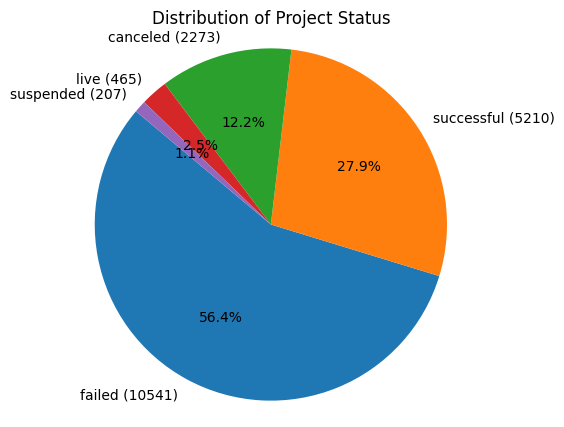

In [ ]:
# Pie chart for distribution of project status
state_counts = kickstarter_clean['state'].value_counts()
plt.figure(figsize=(5, 5))
labels = [f'{state} ({count})' for state, count in zip(state_counts.index, state_counts)]
plt.pie(state_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Project Status')
plt.axis('equal')
plt.show()

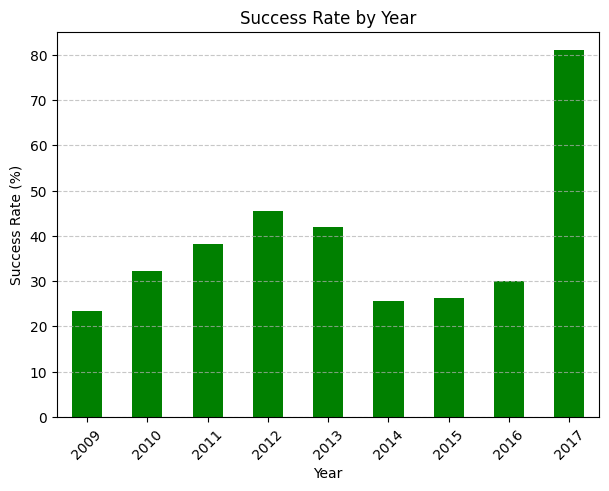

In [ ]:
# Barplot for Success rate by each year
kickstarter_clean['launched_at'] = pd.to_datetime(kickstarter_clean['launched_at'])
kickstarter_clean['launch_year'] = kickstarter_clean['launched_at'].dt.year
success_rate_by_year = kickstarter_clean.groupby(['launch_year', 'state'])['id'].count().unstack(fill_value=0)
success_rate_by_year['Success Rate'] = ((success_rate_by_year['successful'] + success_rate_by_year['live']) /
                                        (success_rate_by_year['successful'] + success_rate_by_year['live'] + success_rate_by_year['canceled'] + success_rate_by_year['failed'] + success_rate_by_year['suspended'])) * 100
plt.figure(figsize=(7, 5))
success_rate_by_year['Success Rate'].plot(kind='bar', color='green')
plt.title('Success Rate by Year')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

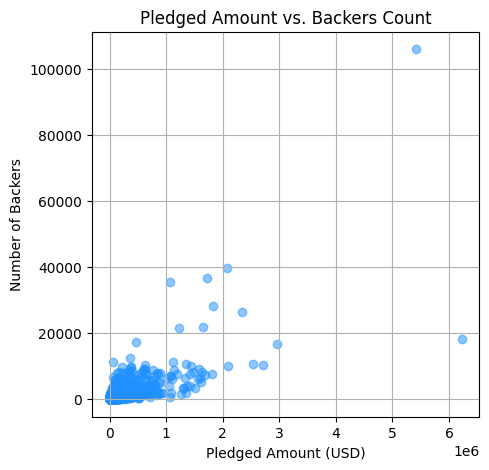

In [ ]:
# Scatter plot for pledged amount & backers count
plt.figure(figsize=(5,5))
plt.scatter(kickstarter_clean['usd_pledged'], kickstarter_clean['backers_count'], color='dodgerblue', alpha=0.5)
plt.title('Pledged Amount vs. Backers Count')
plt.xlabel('Pledged Amount (USD)')
plt.ylabel('Number of Backers')
plt.grid(True)
plt.show()

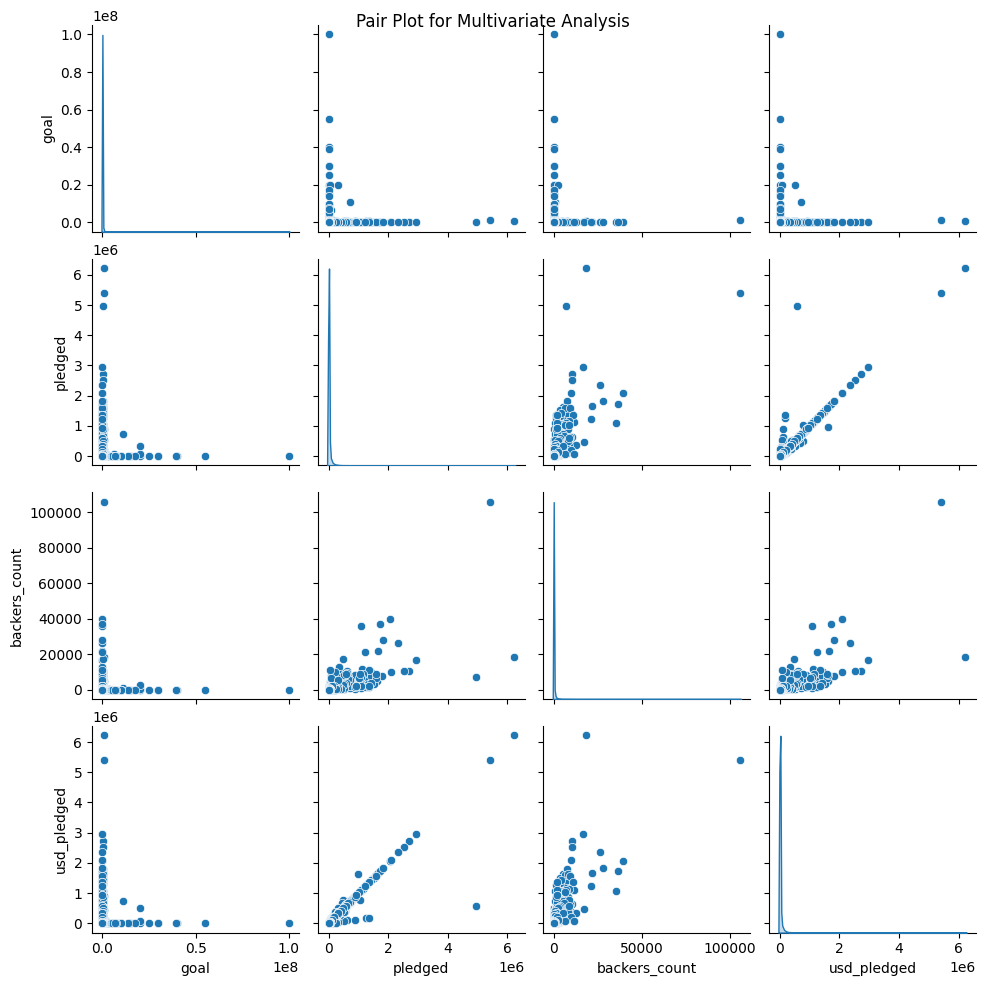

In [ ]:
# Pair plot for multivariate analysis
numerical_columns = ['goal', 'pledged', 'backers_count', 'usd_pledged']
sns.pairplot(kickstarter_clean[numerical_columns], diag_kind='kde')
plt.suptitle('Pair Plot for Multivariate Analysis')
plt.show()

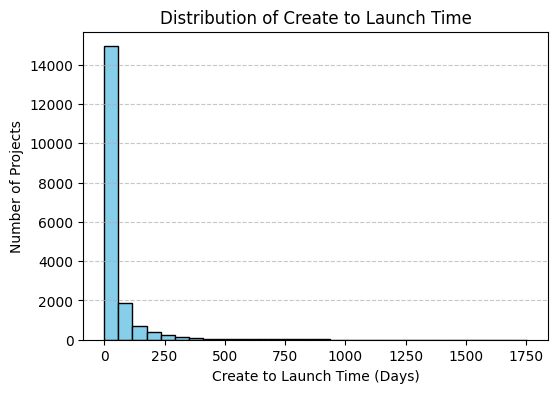

In [ ]:
# Histogram for 'create to launch' times
plt.figure(figsize=(6,4))
plt.hist(kickstarter_clean['create_to_launch_days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Create to Launch Time')
plt.xlabel('Create to Launch Time (Days)')
plt.ylabel('Number of Projects')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

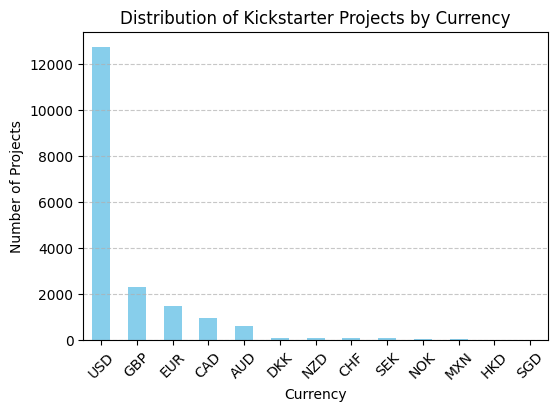

In [ ]:
# Bar chart for Distribution of Kickstarter Projects by Currency
currency_counts = kickstarter_clean['currency'].value_counts()
plt.figure(figsize=(6,4))
currency_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Kickstarter Projects by Currency')
plt.xlabel('Currency')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


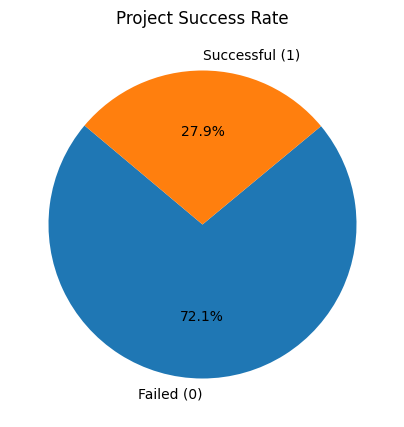

In [ ]:
# Pie chart for Project Success Rate
success_rate = kickstarter_clean['SuccessfulBool'].value_counts(normalize=True) * 100
plt.figure(figsize=(5,5))
success_rate.plot(kind='pie', labels=['Failed (0)', 'Successful (1)'], autopct='%1.1f%%', startangle=140)
plt.title('Project Success Rate')
plt.ylabel('')
plt.show()

In [ ]:
# Calculations
kickstarter_clean['duration_days'] = (pd.to_datetime(kickstarter_clean['deadline']) - pd.to_datetime(kickstarter_clean['launched_at'])).dt.days

duration_success_rate = kickstarter_clean.groupby('duration_days')['SuccessfulBool'].mean().reset_index()

kickstarter_clean['launch_month'] = pd.to_datetime(kickstarter_clean['launched_at']).dt.month
month_success_rate = kickstarter_clean.groupby('launch_month')['SuccessfulBool'].mean().reset_index()

total_pledged = kickstarter_clean['pledged'].sum()
category_pledged = kickstarter_clean.groupby('category')['pledged'].sum().sort_values(ascending=False)
top5_categories = category_pledged.head(5)
top5_categories_percentage = (top5_categories / total_pledged) * 100

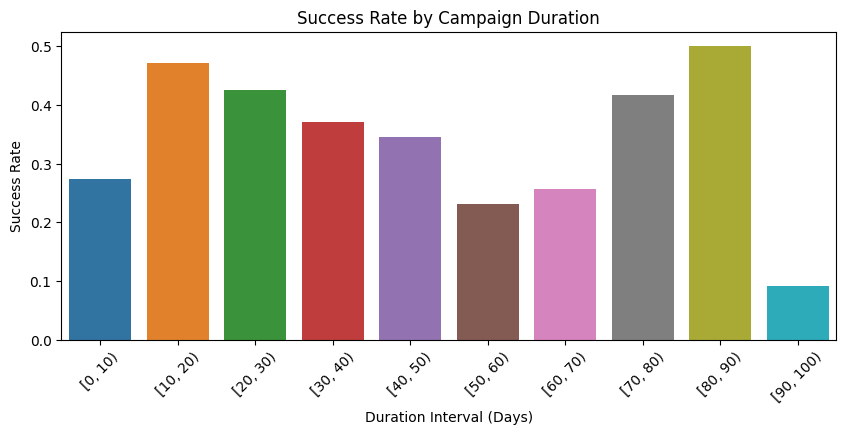

In [ ]:
# Bar chart for Success rate by Campaign Duration
duration_success_rate['duration_interval'] = pd.cut(duration_success_rate['duration_days'], bins=range(0, duration_success_rate['duration_days'].max() + 10, 10), right=False)

interval_success_rate = duration_success_rate.groupby('duration_interval')['SuccessfulBool'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=interval_success_rate, x='duration_interval', y='SuccessfulBool')
plt.title('Success Rate by Campaign Duration')
plt.xlabel('Duration Interval (Days)')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

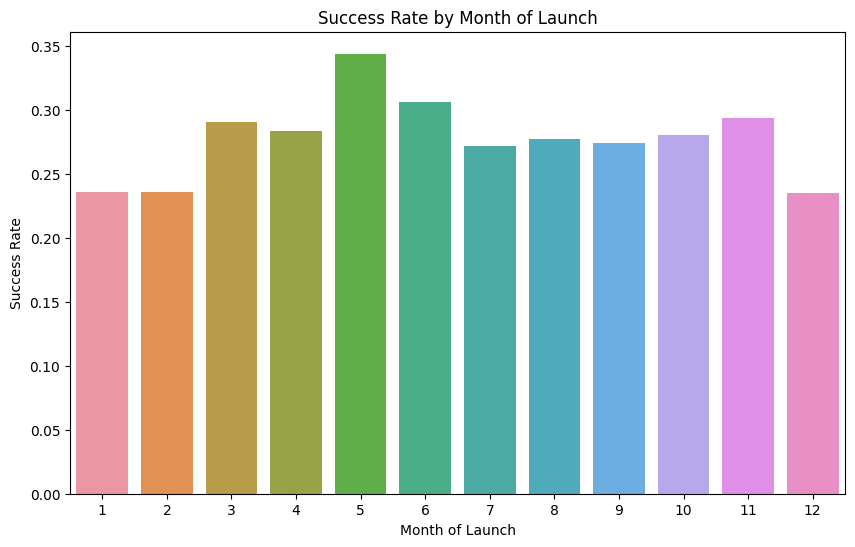

In [ ]:
# Success rate by month of launch
plt.figure(figsize=(10, 6))
sns.barplot(data=month_success_rate, x='launch_month', y='SuccessfulBool')
plt.title('Success Rate by Month of Launch')
plt.xlabel('Month of Launch')
plt.ylabel('Success Rate')
plt.show()

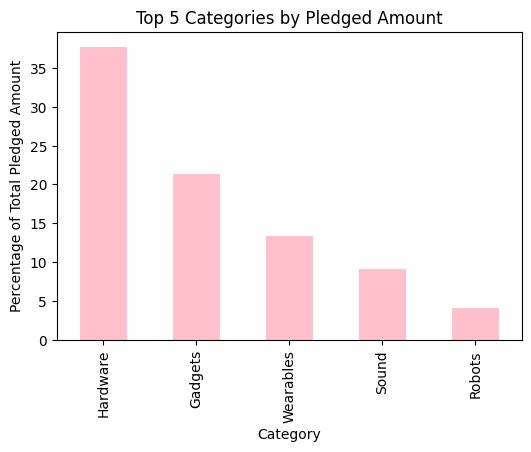

In [ ]:
# Percentage of total pledged amount in top 5 categories
plt.figure(figsize=(6,4))
top5_categories_percentage.plot(kind='bar',color='pink')
plt.title('Top 5 Categories by Pledged Amount')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Pledged Amount')
plt.show()

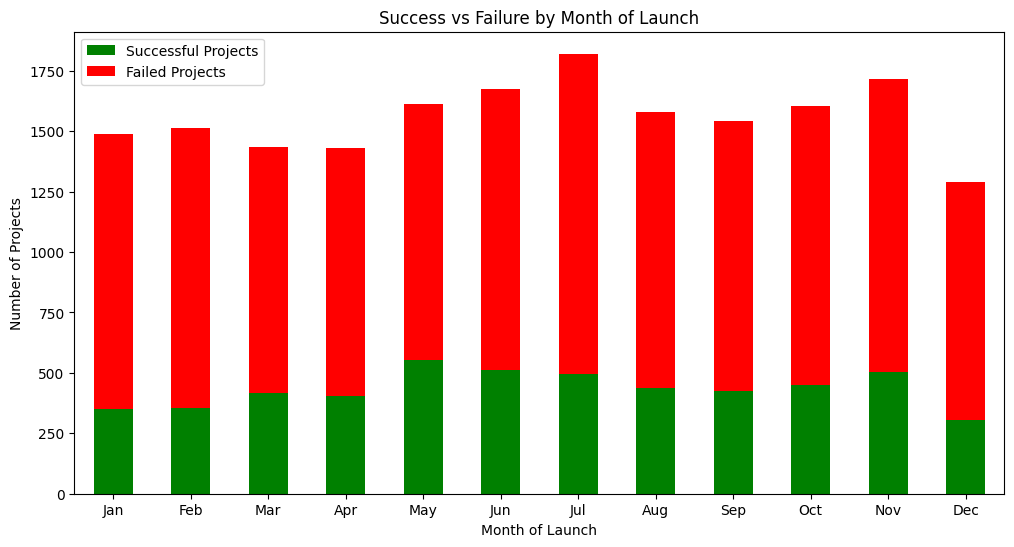

In [ ]:
# Success vs Failure by Month of launch
kickstarter_clean['launch_month'] = pd.to_datetime(kickstarter_clean['launched_at']).dt.month

monthly_data = kickstarter_clean.groupby('launch_month').agg(
    Total_Projects=('id', 'count'),
    Successful_Projects=('SuccessfulBool', 'sum')
)
monthly_data['Failed_Projects'] = monthly_data['Total_Projects'] - monthly_data['Successful_Projects']

# stacked bar chart
monthly_data[['Successful_Projects', 'Failed_Projects']].plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 6))
plt.title('Success vs Failure by Month of Launch')
plt.xlabel('Month of Launch')
plt.ylabel('Number of Projects')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(['Successful Projects', 'Failed Projects'])
#plt.grid(True)
plt.show()

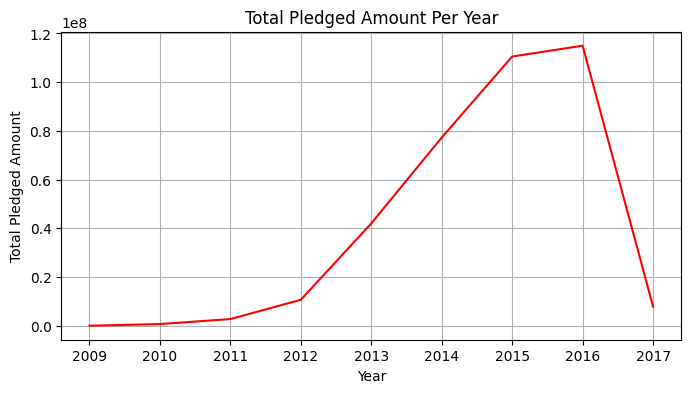

In [ ]:
# Total pledge Amount per year
kickstarter_clean['launch_year'] = pd.to_datetime(kickstarter_clean['launched_at']).dt.year

yearly_pledged = kickstarter_clean.groupby('launch_year')['pledged'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=yearly_pledged, x='launch_year', y='pledged',color='red')
plt.title('Total Pledged Amount Per Year')
plt.xlabel('Year')
plt.ylabel('Total Pledged Amount')
plt.grid(True)
plt.show()

<Figure size 800x400 with 0 Axes>

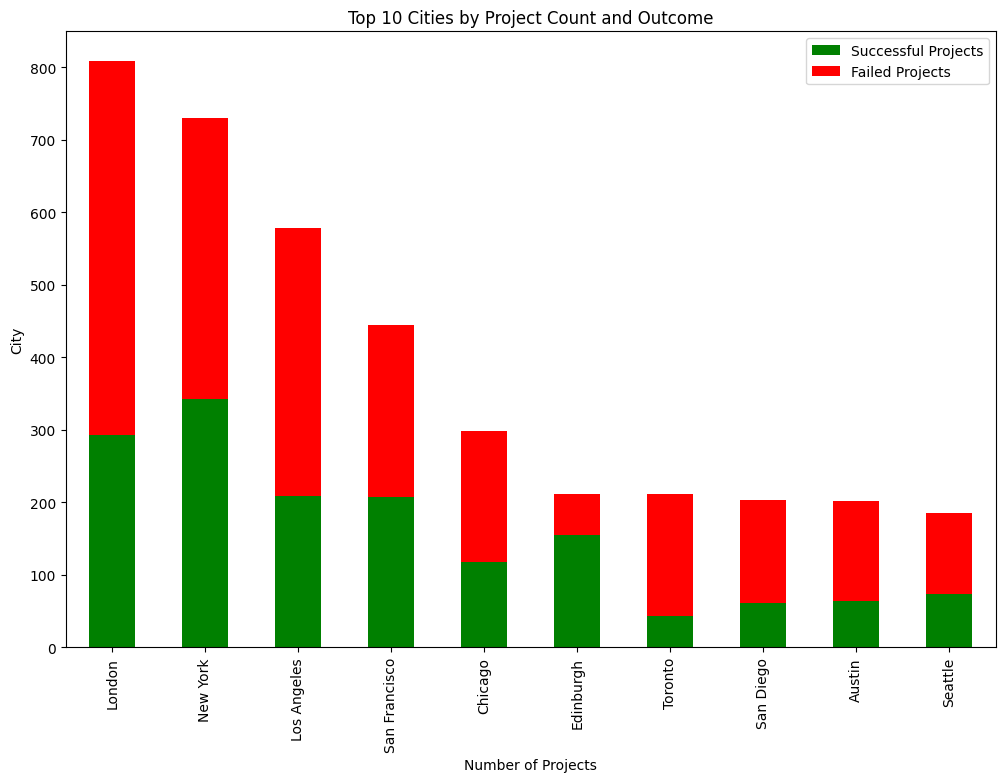

In [ ]:
# Top 10 Cities by Project Count and Outcome
city_analysis = kickstarter_clean.groupby('location_city').agg(
    Total_Projects=('id', 'count'),
    Successful_Projects=('SuccessfulBool', sum)
)
city_analysis['Failed_Projects'] = city_analysis['Total_Projects'] - city_analysis['Successful_Projects']
city_analysis['Success_Rate'] = (city_analysis['Successful_Projects'] / city_analysis['Total_Projects']) * 100

top10_cities = city_analysis.sort_values('Total_Projects', ascending=False).head(10)
plt.figure(figsize=(8,4))
top10_cities_sorted = top10_cities.sort_values('Total_Projects', ascending=False)
top10_cities_sorted[['Successful_Projects', 'Failed_Projects']].plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 8))
plt.title('Top 10 Cities by Project Count and Outcome')
plt.xlabel('Number of Projects')
plt.ylabel('City')
plt.legend(['Successful Projects', 'Failed Projects'])
plt.show()

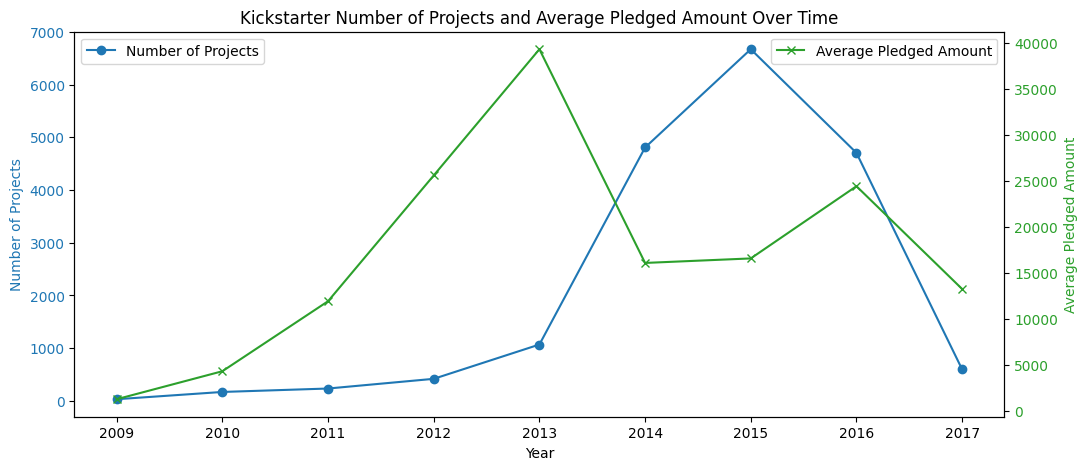

In [ ]:
# Line Graph for Number of Projects and Average Pledged Amount Over Time
projects_per_year = kickstarter_clean.groupby('launch_year').size()

average_pledge_per_year = kickstarter_clean.groupby('launch_year')['pledged'].mean()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting number of projects on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Projects', color='tab:blue')
ax1.plot(projects_per_year.index, projects_per_year, color='tab:blue', marker='o', label='Number of Projects')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a secondary y-axis for average pledged amount
ax2 = ax1.twinx()
ax2.set_ylabel('Average Pledged Amount', color='tab:green')
ax2.plot(average_pledge_per_year.index, average_pledge_per_year, color='tab:green', marker='x', label='Average Pledged Amount')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Kickstarter Number of Projects and Average Pledged Amount Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

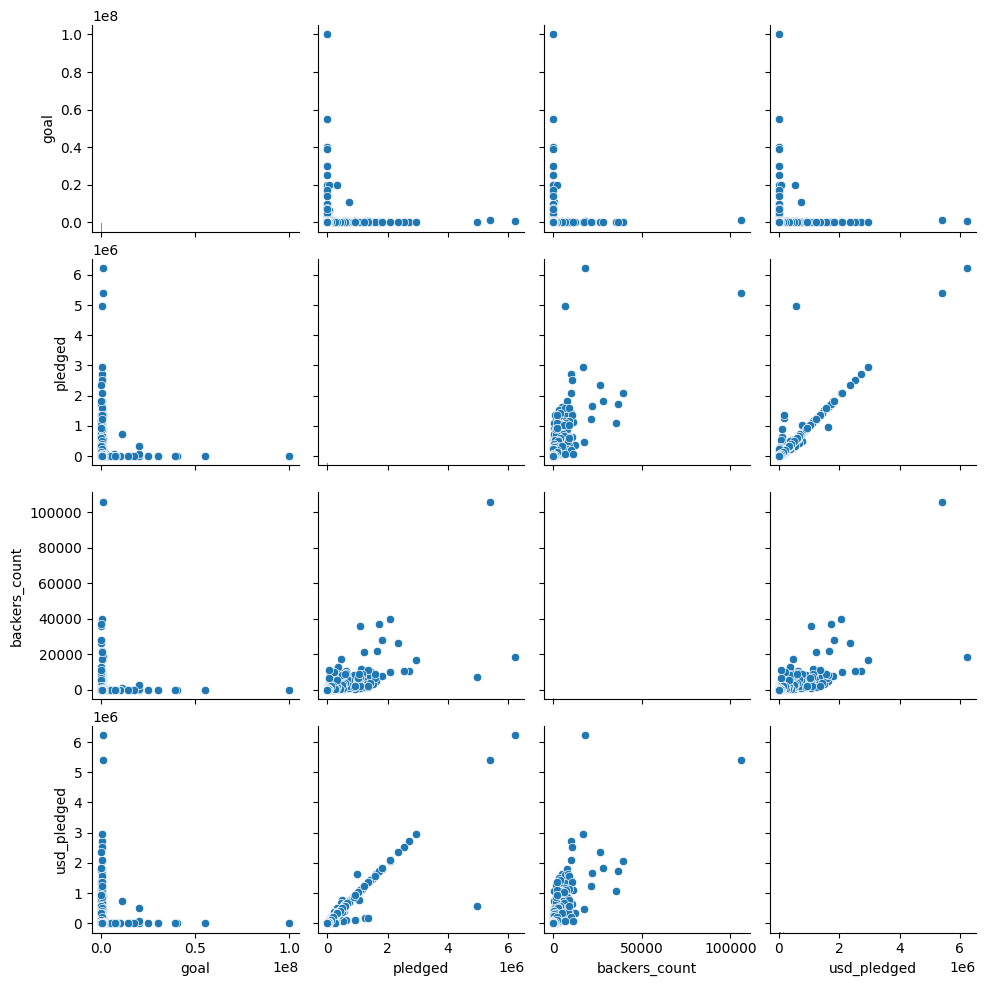

In [ ]:
sns.pairplot(kickstarter_clean[['goal', 'pledged', 'backers_count', 'usd_pledged']])
plt.show()

###Visuals in comparision to US-GDP

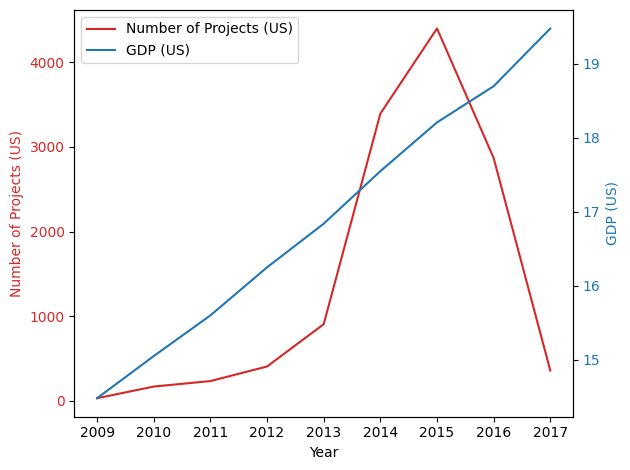

In [ ]:
# Number of projects launched Vs. US GDP
# These GDP values of the United States is taken from the WorldBank data for analysis.
gdp = [14.48, 15.05, 15.6, 16.25, 16.84, 17.55, 18.21, 18.7, 19.48]

projects_per_year_us = kickstarter_clean[kickstarter_clean['country'] == 'US'].groupby('launch_year').size()

years = projects_per_year_us.index
y1 = projects_per_year_us.values
y2 = gdp
fig, ax1 = plt.subplots()

# Line plot for number of projects launched
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Projects (US)', color=color)
ax1.plot(years, y1, color=color, label='Number of Projects (US)')
ax1.tick_params(axis='y', labelcolor=color)

# Line plot for GDP
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('GDP (US)', color=color)
ax2.plot(years, y2, color=color, label='GDP (US)')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

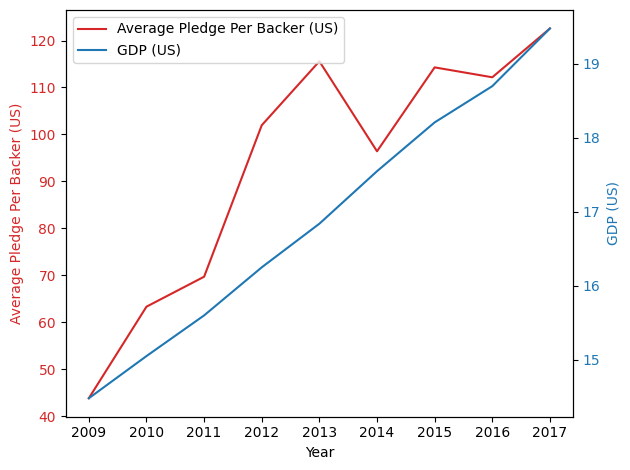

In [ ]:
# Average Pledge per backer Vs. US GDP
kickstarter_clean['avg_pledge_per_backer'] = kickstarter_clean['usd_pledged'] / kickstarter_clean['backers_count']
avg_pledge_per_backer_per_year = kickstarter_clean[kickstarter_clean['country'] == 'US'].groupby('launch_year')['avg_pledge_per_backer'].mean()

years = avg_pledge_per_backer_per_year.index
y1 = avg_pledge_per_backer_per_year.values
y2 = gdp[:len(y1)]
fig, ax1 = plt.subplots()

# Line plot for average pledge per backer
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Pledge Per Backer (US)', color=color)
ax1.plot(years, y1, color=color, label='Average Pledge Per Backer (US)')
ax1.tick_params(axis='y', labelcolor=color)

# Line plot for GDP
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('GDP (US)', color=color)
ax2.plot(years, y2, color=color, label='GDP (US)')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

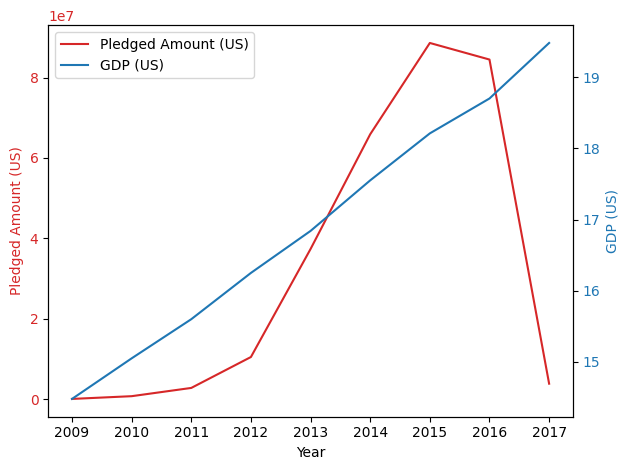

In [ ]:
# Pledged Amount Vs. US GDP
kickstarter_clean['launch_year'] = pd.to_datetime(kickstarter_clean['launched_at']).dt.year

pledged_per_year = kickstarter_clean[kickstarter_clean['country'] == 'US'].groupby('launch_year')['usd_pledged'].sum()

years = pledged_per_year.index
y1 = pledged_per_year.values
y2 = gdp

fig, ax1 = plt.subplots()
# Line plot for pledged amount
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Pledged Amount (US)', color=color)
ax1.plot(years, y1, color=color, label='Pledged Amount (US)')
ax1.tick_params(axis='y', labelcolor=color)

# Line plot for GDP
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('GDP (US)', color=color)
ax2.plot(years, y2, color=color, label='GDP (US)')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

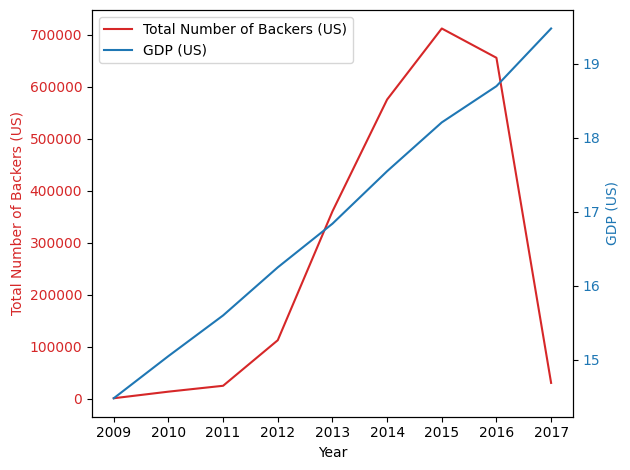

In [ ]:
# Total number of backers Vs. US GDP
total_backers_per_year_us = kickstarter_clean[kickstarter_clean['country'] == 'US'].groupby('launch_year')['backers_count'].sum()

years = total_backers_per_year_us.index
y1 = total_backers_per_year_us.values
y2 = gdp

fig, ax1 = plt.subplots()

# Line plot for total number of backers
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Backers (US)', color=color)
ax1.plot(years, y1, color=color, label='Total Number of Backers (US)')
ax1.tick_params(axis='y', labelcolor=color)

# Line plot for GDP
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('GDP (US)', color=color)
ax2.plot(years, y2, color=color, label='GDP (US)')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

##Predicting of Pledged Amount from 2018 to 2023 using LSTM.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(yearly_pledged.values.reshape(-1, 1))

# Convert to supervised learning problem
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(scaled_data, look_back)

# Split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
11/11 - 2s - loss: 0.0542 - 2s/epoch - 177ms/step
Epoch 2/100
11/11 - 0s - loss: 0.0531 - 34ms/epoch - 3ms/step
Epoch 3/100
11/11 - 0s - loss: 0.0515 - 36ms/epoch - 3ms/step
Epoch 4/100
11/11 - 0s - loss: 0.0505 - 29ms/epoch - 3ms/step
Epoch 5/100
11/11 - 0s - loss: 0.0499 - 30ms/epoch - 3ms/step
Epoch 6/100
11/11 - 0s - loss: 0.0487 - 32ms/epoch - 3ms/step
Epoch 7/100
11/11 - 0s - loss: 0.0485 - 31ms/epoch - 3ms/step
Epoch 8/100
11/11 - 0s - loss: 0.0478 - 31ms/epoch - 3ms/step
Epoch 9/100
11/11 - 0s - loss: 0.0471 - 32ms/epoch - 3ms/step
Epoch 10/100
11/11 - 0s - loss: 0.0469 - 34ms/epoch - 3ms/step
Epoch 11/100
11/11 - 0s - loss: 0.0463 - 32ms/epoch - 3ms/step
Epoch 12/100
11/11 - 0s - loss: 0.0461 - 30ms/epoch - 3ms/step
Epoch 13/100
11/11 - 0s - loss: 0.0460 - 29ms/epoch - 3ms/step
Epoch 14/100
11/11 - 0s - loss: 0.0457 - 32ms/epoch - 3ms/step
Epoch 15/100
11/11 - 0s - loss: 0.0454 - 33ms/epoch - 3ms/step
Epoch 16/100
11/11 - 0s - loss: 0.0454 - 31ms/epoch - 3ms/step
E

1/1 [==============================] - 0s 22ms/step


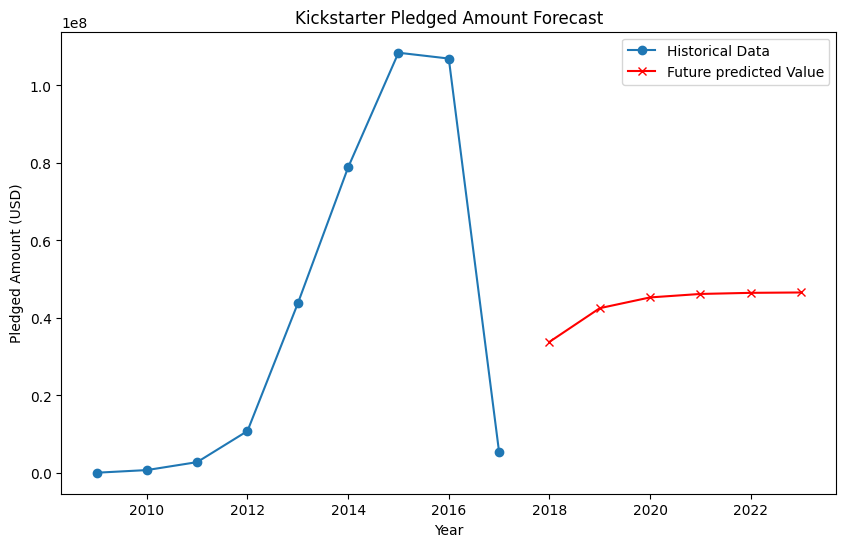

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

yearly_pledged = kickstarter_clean[kickstarter_clean['launch_year'] <= 2017].groupby('launch_year')['usd_pledged'].sum()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(yearly_pledged.values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X, Y, epochs=100, batch_size=1, verbose=0)

# Forecast upto 2023
forecast_period = 6
X_forecast = np.array([scaled_data[-1]])
predictions = []

for _ in range(forecast_period):
    pred = model.predict(X_forecast)
    predictions.append(pred[0][0])
    X_forecast = np.array([[pred[0][0]]])

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(yearly_pledged.index, yearly_pledged.values, label='Historical Data', marker='o')
forecast_years = np.arange(yearly_pledged.index[-1] + 1, yearly_pledged.index[-1] + 1 + forecast_period)
plt.plot(forecast_years, predictions, label='Future predicted Value', marker='x', color='red')

plt.title('Kickstarter Pledged Amount Forecast')
plt.xlabel('Year')
plt.ylabel('Pledged Amount (USD)')
plt.legend()
plt.show()